# [Problem 1] Function for finding impureness

- Function to calculate Gini impurity of a node is given as 
$$I(i)=1-\sum_{i=1}^K P^2(C_i|t)=1-\sum_{i=1}^K(\frac{N_{t,i}}{N_{t,all}})^2$$

Where:
1. **t** is the node index
2. **i** is class index
3. **K** is the number of classes
4. **C_i** is the i-th class
5. **P(C_i|t)** is the percentage of the C_i on the t-th class
6. **N_t,i** is the number of samples belonging to the i-th class of the t-th node
7. **N_t,all** is the total number of samples for the t-th node

###Comparing the results of the manual calculation with the function gives the following:

1. Class 1: Number of samples 15, Class 2: Number of samples 15 → Gini impure 0.500
2. Class 1: Number of samples 15, Class 2: Number of samples 15, Class 3: Number of samples 15 → Gini impure 0.667
3. Class 1: Number of samples 18, Class 2: Number of samples 12 → Gini impure 0.480
4. Class 1: Number of samples 30, Class 2: Number of samples 0 → Gini impure 0.000

In [1]:
# import the dependencies
import numpy as np
import scipy.stats as stats
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [2]:
def gini_impurity(n_t, c_n):
    a = 0
    for i in c_n:   
        a += (i/n_t) ** 2
    gini=1 - a 
    return gini

In [3]:
gini_impurity(30, [15.0 ,15.0])

0.5

In [4]:
gini_impurity(45,[15, 15, 15])

0.6666666666666667

In [5]:
gini_impurity(30,[18, 12])

0.48

In [6]:
gini_impurity(30,[30, 0])

0.0

*****Problem 2: Function for obtaining information gain*****

Information gain or **IG** is calculated by the following formula

$$
IG(p)=I(p)-\frac{N_{left,all}}{N_{p,all}}I(left)-\frac{N_{right}}{N_{p,all}}I(right)
$$

where:
1. **p** is the index indicating the parent node
2. **left** is the index indicating the left-hand node
3. **right** is the index indicating the right-hand node

Lets make a simple example and compare the results of the manual calculation with the function.

Left node class 1: Number of samples 10, Left node class 2: Number of samples 30, <br>
Right node class 1: Number of samples 20, Right node class 2: Number of samples 5 → Information gain 0.143

In [7]:
def information_gain(ln_class,rn_class):
    n1 = sum(ln_class)
    n2 = sum(rn_class)
    p_sample = n1 + n2
    p_class = ln_class + rn_class
    p_gini = gini_impurity(p_sample, p_class)
    gini_n1 = gini_impurity(n1, ln_class)
    gini_n2 = gini_impurity(n2, rn_class)
    print(p_class)
    IG = p_gini - ((n1/p_sample)*gini_n1) - ((n2/p_sample)*gini_n2)
    return IG

In [8]:
information_gain(np.array([10,30]),np.array([20,5]))

[30 35]


0.14319526627218937

# <div class ="alert alert-block alert-success" style='text-align:center'>
<h2> Decision tree From scratch</h2>
</div>

We will start by writting the name of our class which is going to be
```
class ScratchDecesionTreeClassifier():

```

### fit function

In our decision tree classifier we will create our tree in the fit function, by checking the gini impurity and information gain and also coming up with thresholds by which we will use to split our data as we are going down on each depth in our tree

Our fit function will take in the **X** and the **y** data

```
model.fit(X,y)
```

We will start by creating the variables that will store the maximum value of our information gain and also the threshold 

```
self.list_info_gain_max = []
self.threshold_max = []
```

In order to calculate the information gain and get the best thresholds, we need to go through every data that we have, in that case we need to loop through every column that we have and go through every row in each column and calculate the left node for our **X** and left node for our **y** and repeat the same thing for the right node and in the process, we will also acquire the threshold and the information gain

```
for i in range(X.shape[1]):     
    self.list_info_gain = []    
    self.Threshold = []
            
    for j in np.unique(X[:,i]):      
        self.Threshold.append(j)     
        self.X_right = X[X[:,i] >= j]               
        self.y_right = y[X[:,i] >= j]             
        self.X_left = X[X[:,i] < j]               
        self.y_left = y[X[:,i] < j]
        self.list_info_gain.append(self._info_gain(X, y)) 
                
    self.list_info_gain_max.append(max(self.list_info_gain))
    self.ind = self.list_info_gain.index(max(self.list_info_gain)) 
    self.threshold_max.append(self.Threshold[self.ind])
```

we are going to create a condition which we will use to create the right nodes and the left nodes **X[:,i] </>= j**, we will check if the values are greater or equal to the threshold we have selected and we will consider those values as the right side node, and we will do this for both **X** and **y** data, and we check for the left nodes as well,

and after we will calculate the information gain using a helper function and the results returned we will store all of them in our variable created above

```
def _info_gain(self, X, y):
        n = len(X)
        IG = self._gini_impurity(X, y) - len(self.X_left) / n * self._gini_impurity(self.X_left, self.y_left) - len(self.X_right) / n * self._gini_impurity(self.X_right, self.y_right) 
        return IG
```

our info_gain helper function will use the gini impurity as we saw earlier when we were looking at the math behind, so the gini impurity will also be a helper function

```
def _gini_impurity(self, X, y):
        a = 0
        for i in np.unique(y):    
            a += (len(y[y[:,0]==i]) / len(X)) ** 2      
        self.gini = 1 - a
        return self.gini
```

after our information gain is calculated, we will need to get the maximum value out of it and also the maximum value in the threshold, we also need the index of the maximum value of the information gain, and we will use it later in classifying our predictions

```
self.list_info_gain_max.append(max(self.list_info_gain))
self.ind = self.list_info_gain.index(max(self.list_info_gain)) 
self.threshold_max.append(self.Threshold[self.ind])    
```

after getting our the threshold max and the information gain max, we need to get the value that are going to influence the splitting of our tree into left or right.

first we are going to find the index of the maximum value in our list of maximum values of the information gain, and we are going to use it to get the decision threshold that will be based on to create the left and right split,
and we will use the threshold to get the left and right split depending on if the value is greater or less than the threshold

```
self.ind2 = self.list_info_gain_max.index(max(self.list_info_gain_max)) 
self.dicision_threshold = self.threshold_max[self.ind2]
self.Greater_label = stats.mode(y[X[: ,self.ind2] >= self.dicision_threshold]).mode 
self.Less_label = stats.mode(y[X[: ,self.ind2] < self.dicision_threshold]).mode 
```

[stats.mode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html)

In [10]:
class ScratchDecesionTreeClassifier():

    def _gini_impurity(self, X, y):
        a = 0
        for i in np.unique(y):    
            a += (len(y[y[:,0]==i]) / len(X)) ** 2      
        self.gini = 1 - a
        return self.gini
    
    def _info_gain(self, X, y):
        n = len(X)
        IG = self._gini_impurity(X, y) - len(self.X_left) / n * self._gini_impurity(self.X_left, self.y_left) - len(self.X_right) / n * self._gini_impurity(self.X_right, self.y_right) 
        return IG
    
    
    def fit(self, X, y):
        self.list_info_gain_max = []
        self.threshold_max = []
      
        for i in range(X.shape[1]):     
            self.list_info_gain = []    
            self.Threshold = []
            
            for j in np.unique(X[:,i]):      
                self.Threshold.append(j)      
                self.X_right = X[X[:,i] >= j]                
                self.y_right = y[X[:,i] >= j]             
                self.X_left = X[X[:,i] < j]               
                self.y_left = y[X[:,i] < j]
                self.list_info_gain.append(self._info_gain(X, y)) 
                
            self.list_info_gain_max.append(max(self.list_info_gain))
            self.ind = self.list_info_gain.index(max(self.list_info_gain)) 
            self.threshold_max.append(self.Threshold[self.ind])  
            
        self.ind2 = self.list_info_gain_max.index(max(self.list_info_gain_max)) 
        self.dicision_threshold = self.threshold_max[self.ind2]
        self.Greater_label = stats.mode(y[X[: ,self.ind2] >= self.dicision_threshold]).mode 
        self.Less_label = stats.mode(y[X[: ,self.ind2] < self.dicision_threshold]).mode 

### predict function

In our predict function we are going to use the values we got from the fit function in order to classify the values that are uknown to our model

our predict function will take in X data
```
model.predict(X)
```

we will start by create an ndarray that we are going to be broadcasting our prediction values in 
```
self.y_pred = np.zeros(X.shape[0]).reshape(X.shape[0], 1)
```

we will use the labels created in the fit function and check with our conditions and replace the values in the y_pred
```
self.y_pred[X[: ,self.ind2] >= self.dicision_threshold] = self.Greater_label
self.y_pred[X[: ,self.ind2] < self.dicision_threshold] = self.Less_label
```

after we return the predicted values
```
return y_pred
```

In [11]:
def predict(self, X):
    self.y_pred = np.zeros(X.shape[0]).reshape(X.shape[0], 1)
    self.y_pred[X[: ,self.ind2] >= self.dicision_threshold] = self.Greater_label
    self.y_pred[X[: ,self.ind2] < self.dicision_threshold] = self.Less_label
    return self.y_pred

# <div class ="alert alert-block alert-warning" style='text-align:center'>
<h2> Is it accurate? </h2>
</div>

After we create our model from scratch we need to check how good it is by checking different scores and also by visualizing the decision region

In [12]:
class ScratchDecesionTreeClassifier():

    def _gini_impurity(self, X, y):
        a = 0
        for i in np.unique(y):    
            a += (len(y[y[:,0]==i]) / len(X)) ** 2      
        self.gini = 1 - a
        return self.gini
    
    def _info_gain(self, X, y):
        n = len(X)
        IG = self._gini_impurity(X, y) - len(self.X_left) / n * self._gini_impurity(self.X_left, self.y_left) - len(self.X_right) / n * self._gini_impurity(self.X_right, self.y_right) 
        return IG
    
    
    def fit(self, X, y):
        self.list_info_gain_max = []
        self.threshold_max = []
      
        for i in range(X.shape[1]):     
            self.list_info_gain = []    
            self.Threshold = []
            
            for j in np.unique(X[:,i]):      
                self.Threshold.append(j)      
                self.X_right = X[X[:,i] >= j]                
                self.y_right = y[X[:,i] >= j]             
                self.X_left = X[X[:,i] < j]               
                self.y_left = y[X[:,i] < j]
                self.list_info_gain.append(self._info_gain(X, y)) 
                
            self.list_info_gain_max.append(max(self.list_info_gain))
            self.ind = self.list_info_gain.index(max(self.list_info_gain)) 
            self.threshold_max.append(self.Threshold[self.ind])  
            
        self.ind2 = self.list_info_gain_max.index(max(self.list_info_gain_max)) 
        self.dicision_threshold = self.threshold_max[self.ind2]
        self.Greater_label = stats.mode(y[X[: ,self.ind2] >= self.dicision_threshold]).mode 
        self.Less_label = stats.mode(y[X[: ,self.ind2] < self.dicision_threshold]).mode 
        
    def predict(self, X):
        self.y_pred = np.zeros(X.shape[0]).reshape(X.shape[0], 1)
        self.y_pred[X[: ,self.ind2] >= self.dicision_threshold] = self.Greater_label
        self.y_pred[X[: ,self.ind2] < self.dicision_threshold] = self.Less_label
        return self.y_pred

In [13]:
iris = load_iris()
X = iris.data[50:,:]
y = iris.target[50:]
X = X[:,[2,3]]
y = np.where(y == 1, 1, 0)
y = y.reshape(100,1)
iris = np.hstack((y,X))
np.unique(iris[:,0])

array([0., 1.])

In [14]:
ScDt = ScratchDecesionTreeClassifier()
ScDt.fit(X, y)

C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_9844\4165017231.py:38: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  self.Greater_label = stats.mode(y[X[: ,self.ind2] >= self.dicision_threshold]).mode
C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_9844\4165017231.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `ke

In [15]:
ScDt.predict(X)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [16]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0)
ScDt = ScratchDecesionTreeClassifier()
ScDt.fit(X_train, y_train)
y_pred = ScDt.predict(X_test)

C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_9844\4165017231.py:38: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  self.Greater_label = stats.mode(y[X[: ,self.ind2] >= self.dicision_threshold]).mode
C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_9844\4165017231.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `ke

In [17]:
print("{}".format(precision_score(y_test,y_pred)))
print("{}".format(recall_score(y_test,y_pred)))
print("{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

1.0
0.7333333333333333
0.846153846153846
[[15  0]
 [ 4 11]]


# #### Decision region

In [18]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):

    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ["o", "^"]

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

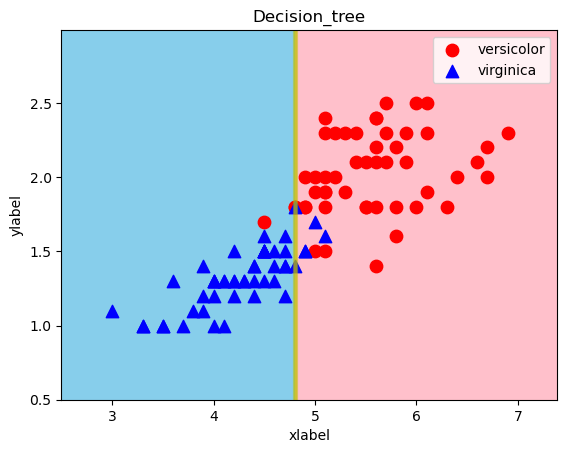

In [19]:
decision_region(X = X, y = y[:,0], model = ScDt, step=0.01, title='Decision_tree', xlabel='xlabel', ylabel='ylabel')

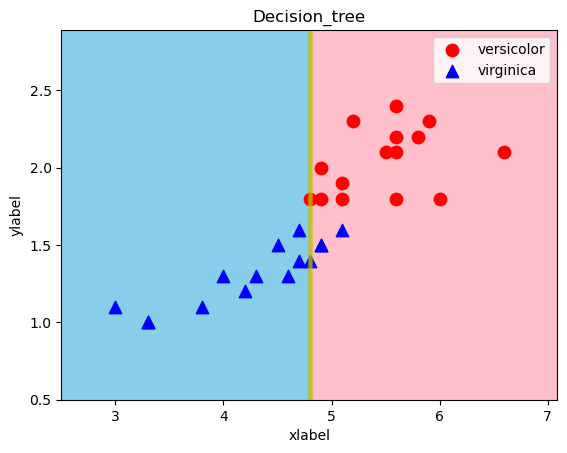

In [20]:
decision_region(X = X_test, y = y_test[:,0], model = ScDt, step=0.01, title='Decision_tree', xlabel='xlabel', ylabel='ylabel')